# aSPEM Experiment : analysis




In [1]:
%load_ext autoreload
%autoreload 2
from __future__ import division, print_function, absolute_import
import glob
import pickle
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np
from scipy import stats

In [2]:
%matplotlib inline
fig_width = 20
t_titre = 35/2
t_label = 25/2
colors = ['black','dimgrey','grey','darkgrey','silver','rosybrown','lightcoral','indianred','firebrick','brown','darkred','red']
from aSPEM import aSPEM
import bayesianchangepoint as bcp

In [3]:
liste = []
for fname in glob.glob('data/*pkl'):
    a = fname.split('/')[1].split('.')[0].split('_')
    liste.append(a)
    #print(a)

In [4]:
exp = []
for x in range(len(liste)) :
    if liste[x][0]=='pari' and liste[x][1] in ['AM','BMC','CS','DC','FM','IP','LB','OP','RS','SR','SR','TN','YK'] :
        a = 'data/%s_%s_%s_%s.pkl'%(liste[x][0], liste[x][1],liste[x][2],liste[x][3])
        with open(a, 'rb') as fichier :
            b = pickle.load(fichier, encoding='latin1')
            exp.append(b)

In [5]:
param = []
for x in range(len(liste)) :
    if liste[x][0]=='pari' and liste[x][1] in ['AM','BMC','CS','DC','FM','IP','LB','OP','RS','SR','SR','TN','YK'] :
        a = 'parametre/param_Fit_%s.pkl'%(liste[x][1])
        with open(a, 'rb') as fichier :
            b = pickle.load(fichier, encoding='latin1')
            param.append(b)

In [6]:
print(len(colors)==len(param)==len(exp))

True


In [7]:
p_hat_bcp_e = [[],[],[],[],[],[],[],[],[],[],[],[],[]]
p_hat_bcp_m = [[],[],[],[],[],[],[],[],[],[],[],[],[]]

for x in range(len(exp)):
        
    N_trials = exp[x]['N_trials']
    N_blocks = exp[x]['N_blocks']
    p = exp[x]['p']
    tau = N_trials/5.
    h = 1./tau
    
    p_hat_block_e = [[],[],[]]
    p_hat_block_m = [[],[],[]]

    
    for block in range(N_blocks):
        liste = [0,50,100,150,200]
        for a in range(len(liste)-1) :
            #----------------------------------------------------
            p_bar, r, beliefs = bcp.inference(p[liste[a]:liste[a+1], block, 0], h=h, p0=.5)
            p_hat_e, r_hat_e = bcp.readout(p_bar, r, beliefs, mode='expectation')
            p_hat_m, r_hat_m = bcp.readout(p_bar, r, beliefs, mode='max')
            
            p_hat_block_e[block].extend(p_hat_e)
            p_hat_block_m[block].extend(p_hat_m)

    p_hat_bcp_e[x] = p_hat_block_e
    p_hat_bcp_m[x] = p_hat_block_m

In [8]:
# liste de tout
full_proba = []
full_bino = []
full_results = []
full_va = []
full_p_hat_e = []
full_p_hat_m = []


# listes de tout par sujet
proba_sujet = []
bino_sujet = []
results_sujet = []
va_sujet = []
p_hat_sujet_e = []
p_hat_sujet_m = []

for x in range(len(exp)):

    N_trials = exp[x]['N_trials']
    N_blocks = exp[x]['N_blocks']
    
    p = exp[x]['p']
    results = (exp[x]['results']+1)/2
    v_anti = param[x]['v_anti']
    p_hat_e = p_hat_bcp_e[x]
    p_hat_m = p_hat_bcp_m[x]
    
    liste_proba = []
    liste_bino = []
    liste_results = []
    liste_va = []
    liste_p_hat_e = []
    liste_p_hat_m = []
    
    for block in range(N_blocks):
                
        switch = []
        for s in range(N_trials):
            if s in [0,50,100,150] :
                switch.append(s)
            if p[s, block, 2]==1 :
                switch.append(s)
        switch.append(N_trials)
        
        for s1 in range(len(switch)-1) :

            for trial in np.arange(switch[s1], switch[s1+1]) :
                full_proba.append(p[trial, block, 1])
                full_bino.append(p[trial, block, 0])
                full_results.append(results[trial, block])
                full_va.append(v_anti[block][trial])

                liste_proba.append(p[trial, block, 1])
                liste_bino.append(p[trial, block, 0])
                liste_results.append(results[trial, block])
                liste_va.append(v_anti[block][trial])

                full_p_hat_e.append(p_hat_e[block][trial])
                full_p_hat_m.append(p_hat_m[block][trial])

                liste_p_hat_e.append(p_hat_e[block][trial])
                liste_p_hat_m.append(p_hat_m[block][trial])


    proba_sujet.append(liste_proba)
    bino_sujet.append(liste_bino)
    results_sujet.append(liste_results)
    va_sujet.append(liste_va)
    p_hat_sujet_e.append(liste_p_hat_e)
    p_hat_sujet_m.append(liste_p_hat_m)

In [9]:
nb_sujet = len(proba_sujet)

0 = TN
1 = SR
2 = FM


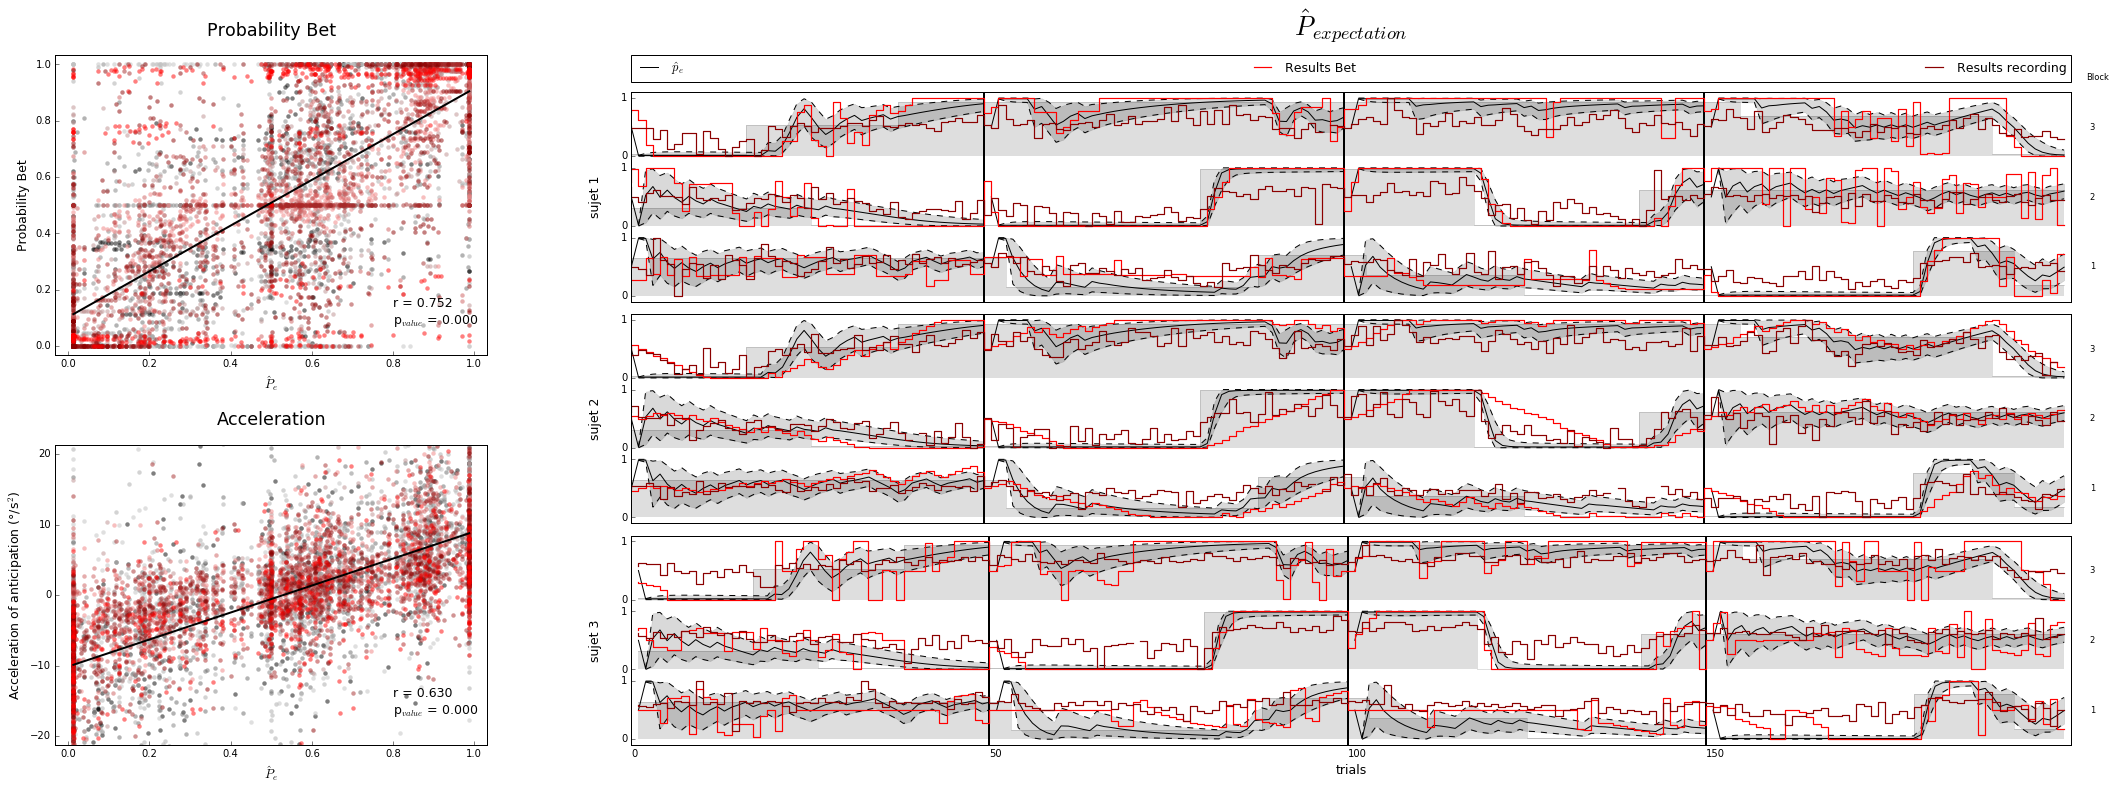

In [10]:
fig, axs = plt.subplots(5, 1, figsize=(fig_width, fig_width/(1.6180)))


gs1 = gridspec.GridSpec(19, 1)
gs1.update(left=0.4, right=1.4, hspace=0.5)
axs[0] = plt.subplot(gs1[1:7])
axs[1] = plt.subplot(gs1[7:13])
axs[2] = plt.subplot(gs1[13:19])

gs2 = gridspec.GridSpec(2, 1)
gs2.update(left=0, right=0.3, hspace=0.3)
axs[3] = plt.subplot(gs2[0])
axs[4] = plt.subplot(gs2[1])


ec = 0.2
for x, color in enumerate(['black','dimgrey','grey']):
    print(x, '=', exp[x]['observer'])
    N_trials = exp[x]['N_trials']
    N_blocks = exp[x]['N_blocks']
    p = exp[x]['p']
    tau = N_trials/5.
    h = 1./tau 
    
    
    axs[x].set_yticks([0, 1, 1+ec, 2+ec, 2+ec*2, 3+ec*2])
    axs[x].set_yticklabels(['0','1','0','1','0','1'])
    axs[x].yaxis.set_label_coords(-0.02, 0.5)
    axs[x].set_ylabel('sujet %s'%(x+1), fontsize=t_label)
    axs[x].bar(49, 3+ec*3, bottom=-ec/2, color='k', width=0, linewidth=2)
    axs[x].bar(99, 3+ec*3, bottom=-ec/2, color='k', width=0, linewidth=2)
    axs[x].bar(149, 3+ec*3, bottom=-ec/2, color='k', width=0, linewidth=2)
    #------------------------------------------------
    ax_block = axs[x].twinx()
    if x==0 :
        ax_block.set_ylabel('Block', fontsize=t_label/1.5, rotation='horizontal', ha='left', va='bottom')
        ax_block.yaxis.set_label_coords(1.01, 1.05)

    ax_block.set_ylim(0, N_blocks)
    ax_block.set_yticks(np.arange(N_blocks)+0.5)
    ax_block.set_yticklabels(np.arange(N_blocks)+1, fontsize=t_label/1.5)
    ax_block.yaxis.set_tick_params(width=0, pad=(t_label/1.5)+10)
    #------------------------------------------------
    
    
    
    results = (exp[x]['results']+1)/2 # results est sur [-1,1] on le ramene sur [0,1]
    v_anti = param[x]['v_anti']
    
    for block in range(N_blocks):
        
        #----------------------------------------------------------------------------------
        liste = [0,50,100,150,200]
        for a in range(len(liste)-1) :
            p_bar, r, beliefs = bcp.inference(p[liste[a]:liste[a+1], block, 0], h=h, p0=.5)
            p_hat, r_hat = bcp.readout(p_bar, r, beliefs)
            p_low, p_sup = np.zeros_like(p_hat), np.zeros_like(p_hat)
            for i_trial in range(50):
                p_low[i_trial], p_sup[i_trial] = stats.beta.ppf([.05, .95], a=p_hat[i_trial]*r_hat[i_trial],
                                                                b=(1-p_hat[i_trial])*r_hat[i_trial])

            if block == 0 :
                if a == 0 :
                    axs[x].plot(np.arange(liste[a], liste[a+1]), block+p_hat+ec*block, c='k',  lw=1, label='$\hat{p}_e$')
                else :
                    axs[x].plot(np.arange(liste[a], liste[a+1]), block+p_hat+ec*block, c='k',  lw=1)
            else :
                axs[x].plot(np.arange(liste[a], liste[a+1]), block+p_hat+ec*block, c='k',  lw=1)
            axs[x].plot(np.arange(liste[a], liste[a+1]), block+p_sup+ec*block, 'k--', lw=1)
            axs[x].plot(np.arange(liste[a], liste[a+1]), block+p_low+ec*block, 'k--', lw=1)

            axs[x].fill_between(np.arange(liste[a], liste[a+1]), block+p_sup+ec*block,
                                block+p_low+ec*block, lw=.5, alpha=.15,
                                facecolor='k')
        
        #----------------------------------------------------------------------------------
        axs[x].step(range(N_trials), block+p[:, block, 1]+ec*block, lw=1, alpha=0.13, c='k')
        axs[x].fill_between(range(N_trials), block+np.zeros_like(p[:, block, 1])+ec*block,
                            block+p[:, block, 1]+ec*block,
                            lw=0, alpha=.13, facecolor='black', step='pre')
        if block == 0 :
            axs[x].step(range(N_trials), block+results[:, block]+ec*block, color='r',
                        lw=1.2, label='Results Bet')
            axs[x].step(range(N_trials), block+((np.array(v_anti[block])-np.nanmin(v_anti))/(np.nanmax(v_anti)-np.nanmin(v_anti)))+ec*block,
                        color='darkred', lw=1.2, label='Results recording')
        else :
            axs[x].step(range(N_trials), block+results[:, block]+ec*block, lw=1.2, color='r')
            axs[x].step(range(N_trials), block+((np.array(v_anti[block])-np.nanmin(v_anti))/(np.nanmax(v_anti)-np.nanmin(v_anti)))+ec*block,
                        color='darkred', lw=1.2)
        #----------------------------------------------------------------------------------

    axs[x].set_ylim(-(ec/2), N_blocks +ec*3-(ec/2))

for x, color in enumerate(colors[:nb_sujet]):
    axs[3].scatter(p_hat_sujet_e[x], results_sujet[x], c=color, alpha=0.5, linewidths=0)
    axs[4].scatter(p_hat_sujet_e[x], va_sujet[x], c=color, alpha=0.5, linewidths=0)

slope, intercept, r_, p_value, std_err = stats.linregress(full_p_hat_e, full_results)
x_test = np.linspace(np.min(full_p_hat_e), np.max(full_p_hat_e), 100)
fitLine = slope * x_test + intercept
axs[3].plot(x_test, fitLine, c='k', linewidth=2)
axs[3].text(0.8,-0.032+(1.032--0.032)/10, 'r = %0.3f \np$_{value}$ = %0.3f '%(r_, p_value), fontsize=t_label)

axs[3].axis([-0.032, 1.032, -0.032, 1.032])
axs[3].set_ylabel('Probability Bet', fontsize=t_label)
axs[3].set_title("Probability Bet", fontsize=t_titre, x=0.5, y=1.05)
axs[3].set_xlabel('$\hat{P}_{e}$', fontsize=t_label) 


full_p_hat_e_nan = np.ma.masked_array(full_p_hat_e, mask=np.isnan(full_va)).compressed()
full_va_nan = np.ma.masked_array(full_va, mask=np.isnan(full_va)).compressed()
slope, intercept, r_value, p_value, std_err = stats.linregress(full_p_hat_e_nan, full_va_nan)
x_test = np.linspace(np.min(full_p_hat_e), np.max(full_p_hat_e), 100)
fitLine = slope * x_test + intercept
axs[4].plot(x_test, fitLine, c='k', linewidth=2)
axs[4].text(0.8,-21.28+(21.28--21.28)/10, 'r = %0.3f \np$_{value}$ = %0.3f '%(r_value, p_value), fontsize=t_label)

axs[4].axis([-0.032, 1.032, -21.28, 21.28])
axs[4].set_ylabel('Acceleration of anticipation (°/s$^2$)', fontsize=t_label)
axs[4].set_title("Acceleration", fontsize=t_titre, x=0.5, y=1.05)
axs[4].set_xlabel('$\hat{P}_{e}$', fontsize=t_label)    
    
    
for i_layer in range(len(axs)) :
    axs[i_layer].xaxis.set_ticks_position('bottom')
    axs[i_layer].yaxis.set_ticks_position('left')
    if i_layer in [0,1] :
        axs[i_layer].set_xticks([])
    elif i_layer == 2 :
        axs[i_layer].set_xlabel('trials', fontsize=t_label)
        axs[i_layer].set_xticks([-1, 49, 99,149])
        axs[i_layer].set_xticklabels([0, 50, 100, 150], ha='left')

axs[0].legend(fontsize=t_label, bbox_to_anchor=(0., 1.05, 1, 0.), loc=4, ncol=3,
              mode="expand", borderaxespad=0.)
axs[0].set_title('$\hat{P}_{expectation}$', fontsize=t_titre*1.5, x=0.5, y=1.25)

plt.show()

0 = TN
1 = SR
2 = FM


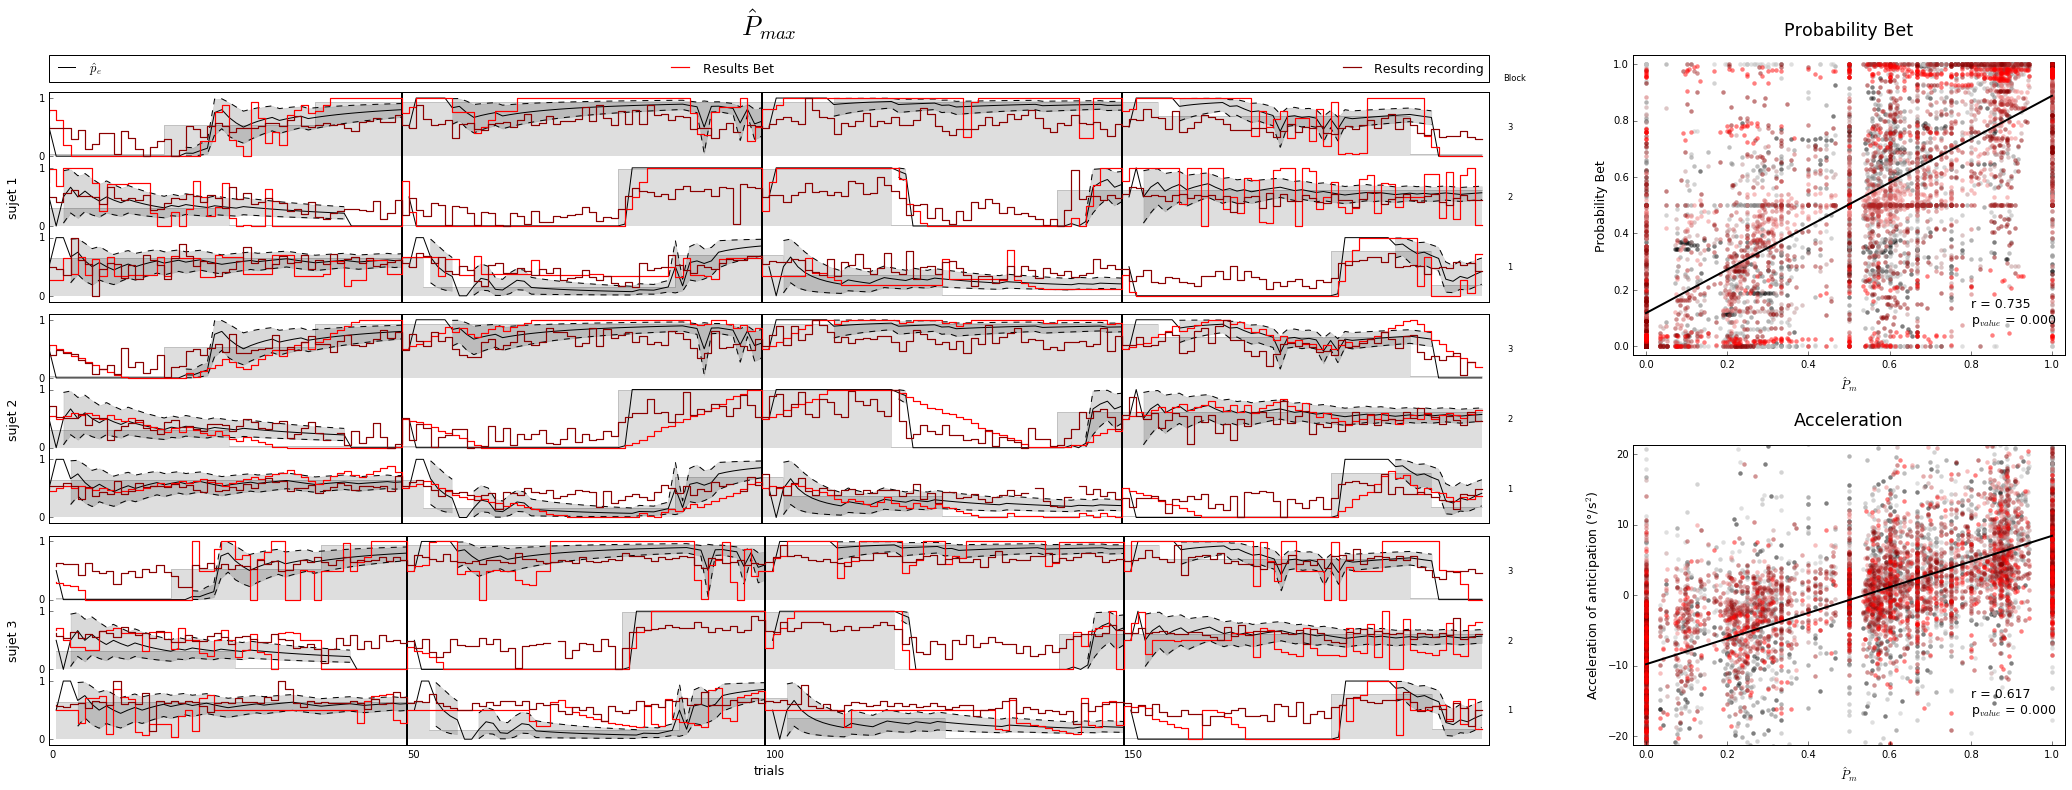

In [11]:
fig, axs = plt.subplots(5, 1, figsize=(fig_width, fig_width/(1.6180)))

gs1 = gridspec.GridSpec(19, 1)
#gs1.update(left=0.4, right=1.4, hspace=0.5)
gs1.update(left=0, right=1, hspace=0.5)
axs[0] = plt.subplot(gs1[1:7])
axs[1] = plt.subplot(gs1[7:13])
axs[2] = plt.subplot(gs1[13:19])

gs2 = gridspec.GridSpec(2, 1)
#gs2.update(left=0, right=0.3, hspace=0.3)
gs2.update(left=1.1, right=1.4, hspace=0.3)
axs[3] = plt.subplot(gs2[0])
axs[4] = plt.subplot(gs2[1])


ec = 0.2
for x, color in enumerate(['black','dimgrey','grey']):
    print(x, '=', exp[x]['observer'])
    N_trials = exp[x]['N_trials']
    N_blocks = exp[x]['N_blocks']
    p = exp[x]['p']
    tau = N_trials/5.
    h = 1./tau 
    
    
    axs[x].set_yticks([0, 1, 1+ec, 2+ec, 2+ec*2, 3+ec*2])
    axs[x].set_yticklabels(['0','1','0','1','0','1'])
    axs[x].yaxis.set_label_coords(-0.02, 0.5)
    axs[x].set_ylabel('sujet %s'%(x+1), fontsize=t_label)
    axs[x].bar(49, 3+ec*3, bottom=-ec/2, color='k', width=0, linewidth=2)
    axs[x].bar(99, 3+ec*3, bottom=-ec/2, color='k', width=0, linewidth=2)
    axs[x].bar(149, 3+ec*3, bottom=-ec/2, color='k', width=0, linewidth=2)
    #------------------------------------------------
    ax_block = axs[x].twinx()
    if x==0 :
        ax_block.set_ylabel('Block', fontsize=t_label/1.5, rotation='horizontal', ha='left', va='bottom')
        ax_block.yaxis.set_label_coords(1.01, 1.05)

    ax_block.set_ylim(0, N_blocks)
    ax_block.set_yticks(np.arange(N_blocks)+0.5)
    ax_block.set_yticklabels(np.arange(N_blocks)+1, fontsize=t_label/1.5)
    ax_block.yaxis.set_tick_params(width=0, pad=(t_label/1.5)+10)
    #------------------------------------------------
    
    results = (exp[x]['results']+1)/2 # results est sur [-1,1] on le ramene sur [0,1]
    v_anti = param[x]['v_anti']
    
    for block in range(N_blocks):
        
        #----------------------------------------------------------------------------------
        liste = [0,50,100,150,200]
        for a in range(len(liste)-1) :
            p_bar, r, beliefs = bcp.inference(p[liste[a]:liste[a+1], block, 0], h=h, p0=.5)
            p_hat, r_hat = bcp.readout(p_bar, r, beliefs, mode='max')
            p_low, p_sup = np.zeros_like(p_hat), np.zeros_like(p_hat)
            for i_trial in range(50):
                p_low[i_trial], p_sup[i_trial] = stats.beta.ppf([.05, .95], a=p_hat[i_trial]*r_hat[i_trial],
                                                                b=(1-p_hat[i_trial])*r_hat[i_trial])

            if block == 0 :
                if a == 0 :
                    axs[x].plot(np.arange(liste[a], liste[a+1]), block+p_hat+ec*block, c='k',  lw=1, label='$\hat{p}_e$')
                else :
                    axs[x].plot(np.arange(liste[a], liste[a+1]), block+p_hat+ec*block, c='k',  lw=1)
            else :
                axs[x].plot(np.arange(liste[a], liste[a+1]), block+p_hat+ec*block, c='k',  lw=1)
            axs[x].plot(np.arange(liste[a], liste[a+1]), block+p_sup+ec*block, 'k--', lw=1)
            axs[x].plot(np.arange(liste[a], liste[a+1]), block+p_low+ec*block, 'k--', lw=1)

            axs[x].fill_between(np.arange(liste[a], liste[a+1]), block+p_sup+ec*block,
                                block+p_low+ec*block, lw=.5, alpha=.15,
                                facecolor='k')
        
        #----------------------------------------------------------------------------------
        axs[x].step(range(N_trials), block+p[:, block, 1]+ec*block, lw=1, alpha=0.13, c='k')
        axs[x].fill_between(range(N_trials), block+np.zeros_like(p[:, block, 1])+ec*block,
                            block+p[:, block, 1]+ec*block,
                            lw=0, alpha=.13, facecolor='black', step='pre')
        if block == 0 :
            axs[x].step(range(N_trials), block+results[:, block]+ec*block, color='r',
                        lw=1.2, label='Results Bet')
            axs[x].step(range(N_trials), block+((np.array(v_anti[block])-np.nanmin(v_anti))/(np.nanmax(v_anti)-np.nanmin(v_anti)))+ec*block,
                        color='darkred', lw=1.2, label='Results recording')
        else :
            axs[x].step(range(N_trials), block+results[:, block]+ec*block, lw=1.2, color='r')
            axs[x].step(range(N_trials), block+((np.array(v_anti[block])-np.nanmin(v_anti))/(np.nanmax(v_anti)-np.nanmin(v_anti)))+ec*block,
                        color='darkred', lw=1.2)
        #----------------------------------------------------------------------------------

    axs[x].set_ylim(-(ec/2), N_blocks +ec*3-(ec/2))

for x, color in enumerate(colors[:nb_sujet]):
    axs[3].scatter(p_hat_sujet_m[x], results_sujet[x], c=color, alpha=0.5, linewidths=0)
    axs[4].scatter(p_hat_sujet_m[x], va_sujet[x], c=color, alpha=0.5, linewidths=0)

slope, intercept, r_, p_value, std_err = stats.linregress(full_p_hat_m, full_results)
x_test = np.linspace(np.min(full_p_hat_m), np.max(full_p_hat_m), 100)
fitLine = slope * x_test + intercept
axs[3].plot(x_test, fitLine, c='k', linewidth=2)
axs[3].text(0.8,-0.032+(1.032--0.032)/10, 'r = %0.3f \np$_{value}$ = %0.3f '%(r_, p_value), fontsize=t_label)

axs[3].axis([-0.032, 1.032, -0.032, 1.032])
axs[3].set_ylabel('Probability Bet', fontsize=t_label)
axs[3].set_title("Probability Bet", fontsize=t_titre, x=0.5, y=1.05)
axs[3].set_xlabel('$\hat{P}_{m}$', fontsize=t_label) 

full_p_hat_m_nan = np.ma.masked_array(full_p_hat_m, mask=np.isnan(full_va)).compressed()
full_va_nan = np.ma.masked_array(full_va, mask=np.isnan(full_va)).compressed()
slope, intercept, r_value, p_value, std_err = stats.linregress(full_p_hat_m_nan, full_va_nan)
x_test = np.linspace(np.min(full_p_hat_m), np.max(full_p_hat_m), 100)
fitLine = slope * x_test + intercept
axs[4].plot(x_test, fitLine, c='k', linewidth=2)
axs[4].text(0.8,-21.28+(21.28--21.28)/10, 'r = %0.3f \np$_{value}$ = %0.3f '%(r_value, p_value), fontsize=t_label)

axs[4].axis([-0.032, 1.032, -21.28, 21.28])
axs[4].set_ylabel('Acceleration of anticipation (°/s$^2$)', fontsize=t_label)
axs[4].set_title("Acceleration", fontsize=t_titre, x=0.5, y=1.05)
axs[4].set_xlabel('$\hat{P}_{m}$', fontsize=t_label)    
    
    
for i_layer in range(len(axs)) :
    axs[i_layer].xaxis.set_ticks_position('bottom')
    axs[i_layer].yaxis.set_ticks_position('left')
    if i_layer in [0,1] :
        axs[i_layer].set_xticks([])
    elif i_layer == 2 :
        axs[i_layer].set_xlabel('trials', fontsize=t_label)
        axs[i_layer].set_xticks([-1, 49, 99,149])
        axs[i_layer].set_xticklabels([0, 50, 100, 150], ha='left')

axs[0].legend(fontsize=t_label, bbox_to_anchor=(0., 1.05, 1, 0.), loc=4, ncol=3,
              mode="expand", borderaxespad=0.)
axs[0].set_title('$\hat{P}_{max}$', fontsize=t_titre*1.5, x=0.5, y=1.25)

plt.show()

## Figure Poster

In [12]:
for x in range(len(exp)):
    print(x, 'sujet =', exp[x]['observer'])

0 sujet = TN
1 sujet = SR
2 sujet = FM
3 sujet = LB
4 sujet = YK
5 sujet = DC
6 sujet = IP
7 sujet = AM
8 sujet = BMC
9 sujet = OP
10 sujet = CS
11 sujet = RS


In [13]:
t_titre = 35
t_label = 25
fig_width= 15

In [14]:
def figure(mode) :
    fig, axs = plt.subplots(4, 1, figsize=(fig_width, fig_width/(1.6180)))


    gs1 = gridspec.GridSpec(2, 1)
    gs1.update(left=0, bottom=1/3, right=1, top=1., hspace=0.05)
    axs[0] = plt.subplot(gs1[0])
    axs[1] = plt.subplot(gs1[1])

    gs2 = gridspec.GridSpec(1, 2)
    #a = (1/3-0.16)
    gs2.update(left=0, bottom=-1/2+((1/3)-0.16), right=1, top=(1/3)-0.16, wspace=0.2)
    axs[2] = plt.subplot(gs2[0])
    axs[3] = plt.subplot(gs2[1])


    ec = 0.2
    for x, color in enumerate(['dimgrey','grey']):
        s = [6,10]
        print(s[x], '=', exp[s[x]]['observer'])
        N_trials = exp[s[x]]['N_trials']
        N_blocks = exp[s[x]]['N_blocks']
        p = exp[s[x]]['p']
        tau = N_trials/5.
        h = 1./tau 


        axs[x].set_yticks([0, 1, 1+ec, 2+ec, 2+ec*2, 3+ec*2])
        axs[x].set_yticklabels(['0','1','0','1','0','1'],fontsize=t_label/2)
        axs[x].yaxis.set_label_coords(-0.02, 0.5)
        axs[x].set_ylabel('sujet %s'%(x+1), fontsize=t_label)
        axs[x].bar(49, 3+ec*3, bottom=-ec/2, color='k', width=0, linewidth=2)
        axs[x].bar(99, 3+ec*3, bottom=-ec/2, color='k', width=0, linewidth=2)
        axs[x].bar(149, 3+ec*3, bottom=-ec/2, color='k', width=0, linewidth=2)
        #------------------------------------------------
        ax_block = axs[x].twinx()
        if x==0 :
            ax_block.set_ylabel('Block', fontsize=t_label/1.5, rotation='horizontal', ha='left', va='bottom')
            ax_block.yaxis.set_label_coords(1.01, 1.08)

        ax_block.set_ylim(0, N_blocks)
        ax_block.set_yticks(np.arange(N_blocks)+0.5)
        ax_block.set_yticklabels(np.arange(N_blocks)+1, fontsize=t_label/1.5)
        ax_block.yaxis.set_tick_params(width=0, pad=(t_label/1.5)+10)
        #------------------------------------------------



        results = (exp[s[x]]['results']+1)/2 # results est sur [-1,1] on le ramene sur [0,1]
        v_anti = param[s[x]]['v_anti']

        for block in range(N_blocks):

            #----------------------------------------------------------------------------------
            liste = [0,50,100,150,200]
            for a in range(len(liste)-1) :
                p_bar, r, beliefs = bcp.inference(p[liste[a]:liste[a+1], block, 0], h=h, p0=.5)
                p_hat, r_hat = bcp.readout(p_bar, r, beliefs,mode=mode)
                p_low, p_sup = np.zeros_like(p_hat), np.zeros_like(p_hat)
                for i_trial in range(50):
                    p_low[i_trial], p_sup[i_trial] = stats.beta.ppf([.05, .95], a=p_hat[i_trial]*r_hat[i_trial],
                                                                    b=(1-p_hat[i_trial])*r_hat[i_trial])

                if block == 0 :
                    if a == 0 :
                        axs[x].plot(np.arange(liste[a], liste[a+1]), block+p_hat+ec*block, c='k',
                                    alpha=.9, lw=1,
                                    label='$\hat{p}_{%s}$'%(mode))
                    else :
                        axs[x].plot(np.arange(liste[a], liste[a+1]), block+p_hat+ec*block, c='k',
                                    alpha=.9, lw=0.9)
                else :
                    axs[x].plot(np.arange(liste[a], liste[a+1]), block+p_hat+ec*block, c='k',
                                alpha=.9, lw=0.9)
                axs[x].plot(np.arange(liste[a], liste[a+1]), block+p_sup+ec*block, 'k--',
                            alpha=.9, lw=0.9)
                axs[x].plot(np.arange(liste[a], liste[a+1]), block+p_low+ec*block, 'k--',
                            alpha=.9, lw=0.9)

                axs[x].fill_between(np.arange(liste[a], liste[a+1]), block+p_sup+ec*block,
                                    block+p_low+ec*block, lw=.5, alpha=.15,
                                    facecolor='k')

            #----------------------------------------------------------------------------------
            axs[x].step(range(N_trials), block+p[:, block, 1]+ec*block, lw=1, alpha=0.13, c='k')
            axs[x].fill_between(range(N_trials), block+np.zeros_like(p[:, block, 1])+ec*block,
                                block+p[:, block, 1]+ec*block,
                                lw=0, alpha=.13, facecolor='black', step='pre')
            if block == 0 :
                axs[x].step(range(N_trials), block+results[:, block]+ec*block, color='r',
                            lw=1.2, label='Individual guess')
                axs[x].step(range(N_trials),
                            block+((np.array(v_anti[block])-np.nanmin(v_anti))/(np.nanmax(v_anti)-np.nanmin(v_anti)))+ec*block,
                            color='darkred', lw=1.2, label='Eye movements')
            else :
                axs[x].step(range(N_trials), block+results[:, block]+ec*block, lw=1.2, color='r')
                axs[x].step(range(N_trials),
                            block+((np.array(v_anti[block])-np.nanmin(v_anti))/(np.nanmax(v_anti)-np.nanmin(v_anti)))+ec*block,
                            color='darkred', lw=1.2)
            #----------------------------------------------------------------------------------

        axs[x].set_ylim(-(ec/2), N_blocks +ec*3-(ec/2))
    
    if mode=='expectation' :
        p_hat_sujet = p_hat_sujet_e
        full_p_hat = full_p_hat_e
    elif mode=='max' :
        p_hat_sujet = p_hat_sujet_m
        full_p_hat = full_p_hat_m
        
    for x, color in enumerate(colors[:nb_sujet]):
        axs[2].scatter(p_hat_sujet[x], results_sujet[x], c=color, alpha=0.5, linewidths=0)
        axs[3].scatter(p_hat_sujet[x], va_sujet[x], c=color, alpha=0.5, linewidths=0)

    slope, intercept, r_, p_value, std_err = stats.linregress(full_p_hat, full_results)
    x_test = np.linspace(np.min(full_p_hat), np.max(full_p_hat), 100)
    fitLine = slope * x_test + intercept
    axs[2].plot(x_test, fitLine, c='k', linewidth=2)
    axs[2].text(0.75,-0.032+(1.032--0.032)/10, 'r = %0.3f'%(r_), fontsize=t_label/1.2)

    axs[2].axis([-0.032, 1.032, -0.032, 1.032])
    axs[2].set_ylabel('Probability Bet', fontsize=t_label/1.2)
    axs[2].set_title("Probability Bet", fontsize=t_titre/1.2, x=0.5, y=1.05)
    axs[2].set_xlabel('$\hat{P}_{%s}$'%(mode), fontsize=t_label/1.2) 


    full_p_hat_nan = np.ma.masked_array(full_p_hat, mask=np.isnan(full_va)).compressed()
    full_va_nan = np.ma.masked_array(full_va, mask=np.isnan(full_va)).compressed()
    slope, intercept, r_value, p_value, std_err = stats.linregress(full_p_hat_nan, full_va_nan)
    x_test = np.linspace(np.min(full_p_hat), np.max(full_p_hat), 100)
    fitLine = slope * x_test + intercept
    axs[3].plot(x_test, fitLine, c='k', linewidth=2)
    axs[3].text(0.75,-21.28+(21.28--21.28)/10, 'r = %0.3f'%(r_value), fontsize=t_label/1.2)

    axs[3].axis([-0.032, 1.032, -21.28, 21.28])
    axs[3].set_ylabel('Acceleration of anticipation (°/s$^2$)', fontsize=t_label/1.2)
    axs[3].set_title("Acceleration", fontsize=t_titre/1.2, x=0.5, y=1.05)
    axs[3].set_xlabel('$\hat{P}_{%s}$'%(mode), fontsize=t_label/1.2)    


    for i_layer in range(len(axs)) :
        axs[i_layer].xaxis.set_ticks_position('bottom')
        axs[i_layer].yaxis.set_ticks_position('left')
        axs[i_layer].xaxis.set_tick_params(labelsize=t_label/2)
        axs[i_layer].yaxis.set_tick_params(labelsize=t_label/2)
        if i_layer == 0 :
            axs[i_layer].set_xticks([])
        elif i_layer == 1 :
            axs[i_layer].set_xlabel('Trials', fontsize=t_label)
            axs[i_layer].set_xticks([-1, 49, 99,149])
            axs[i_layer].set_xticklabels([0, 50, 100, 150], ha='left',fontsize=t_label/2)

    axs[0].legend(fontsize=t_label/1.5, bbox_to_anchor=(0., 1.05, 1, 0.), loc=4, ncol=3,
                  mode="expand", borderaxespad=0.)
    axs[0].set_title('Results bayesian change point %s'%(mode), fontsize=t_titre*1.5, x=0.5, y=1.25)

    plt.show()

6 = IP
10 = CS


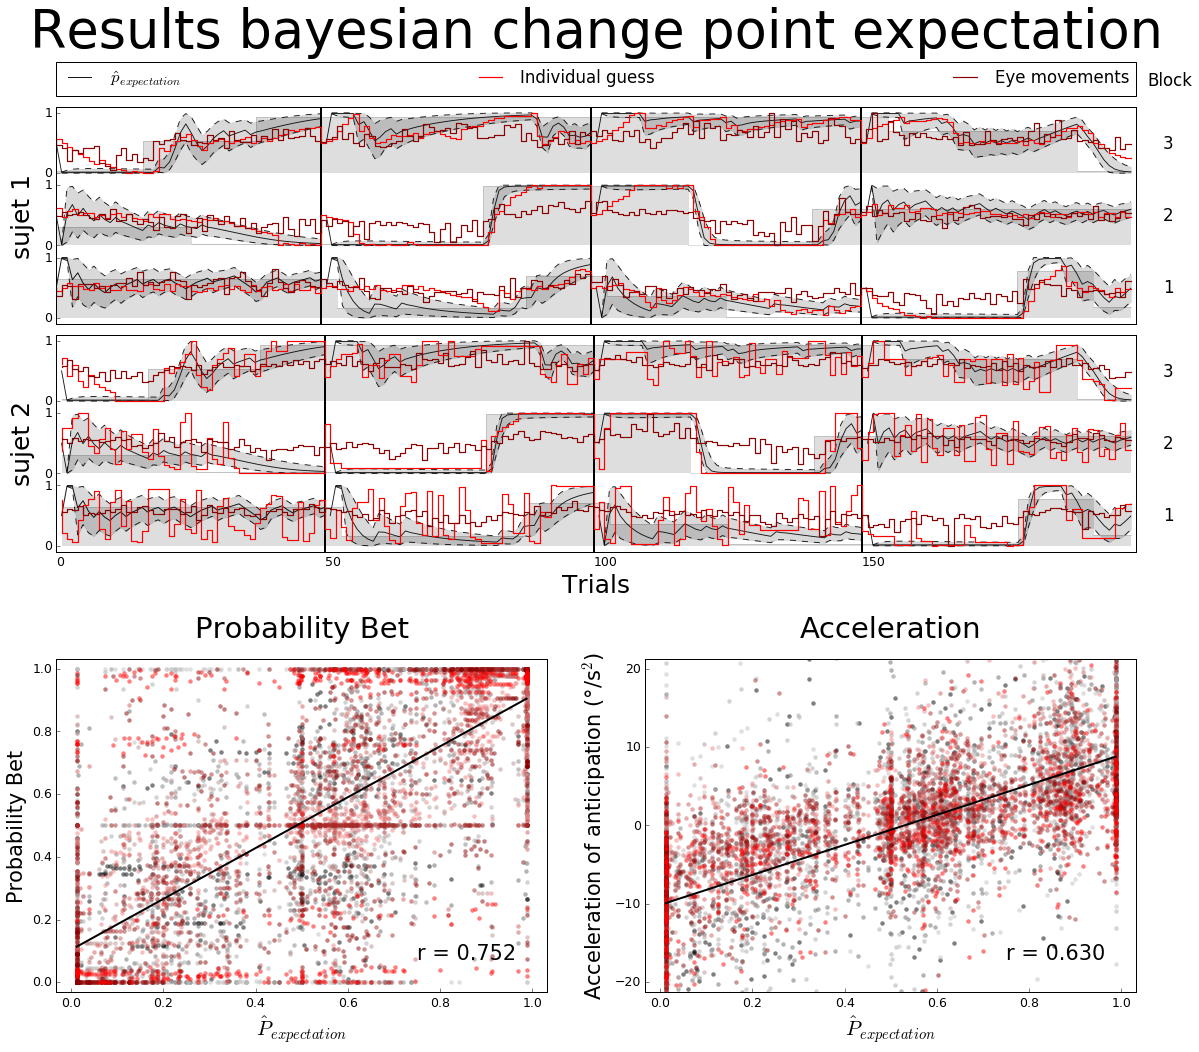

In [15]:
figure(mode='expectation')

6 = IP
10 = CS


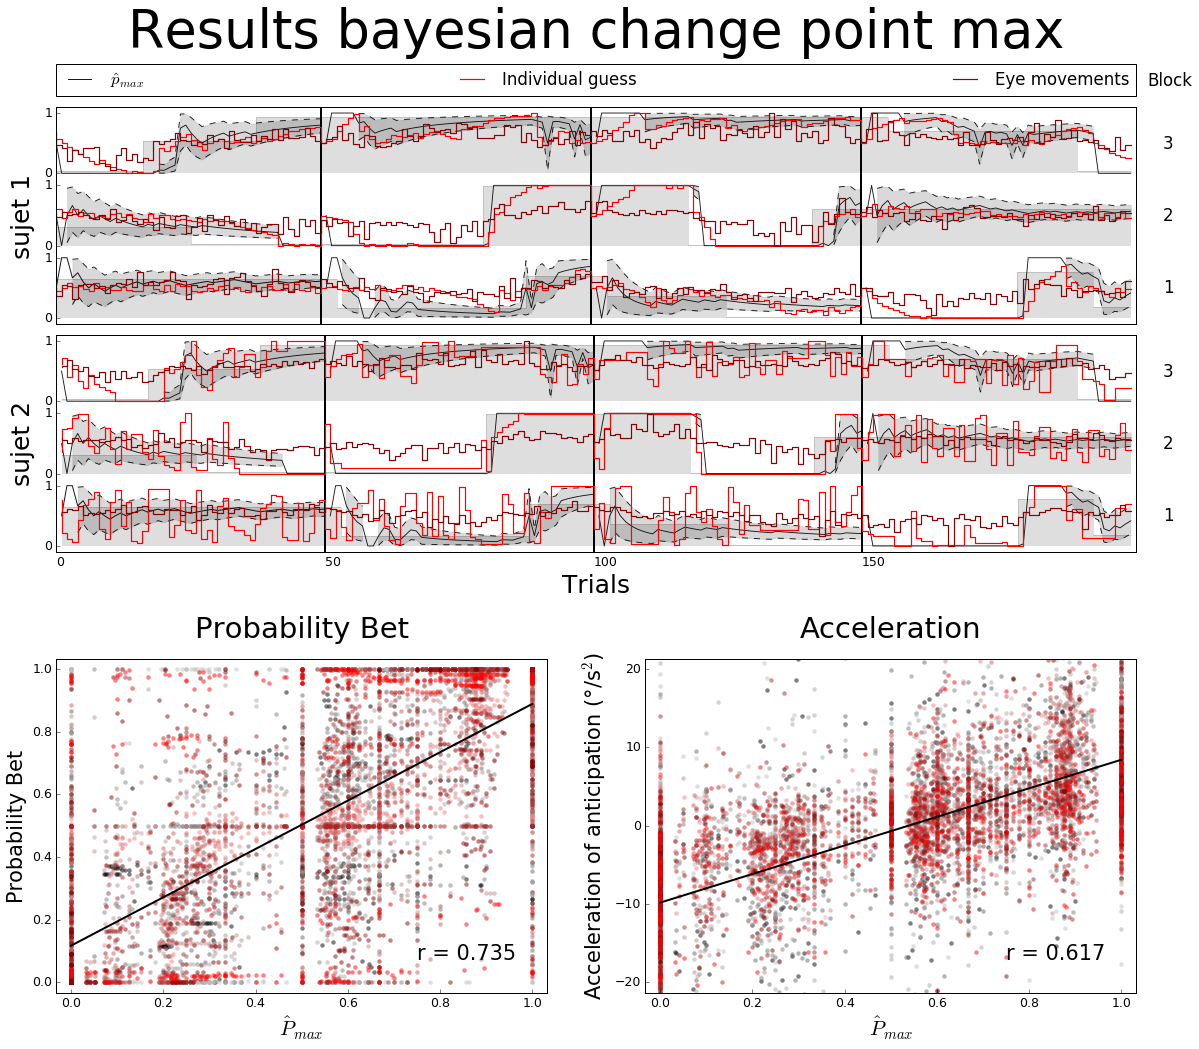

In [16]:
figure(mode='max')